In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [67]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [68]:
df.shape

(400, 9)

In [69]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [70]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [71]:
from sklearn.preprocessing import Binarizer

In [72]:
bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [73]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [74]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [75]:
y = y.astype('int')

In [76]:
y


0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [77]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


<Axes: xlabel='Chance of Admit ', ylabel='count'>

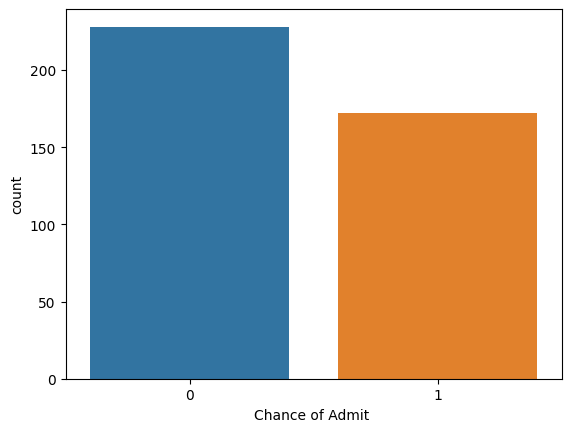

In [78]:
sns.countplot(x = y)

In [79]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [80]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.75)

In [82]:
x_train.shape

(300, 8)

In [83]:
x_test.shape

(100, 8)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
classifier = DecisionTreeClassifier(random_state=0)

In [86]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
y_pred = classifier.predict(x_test)

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

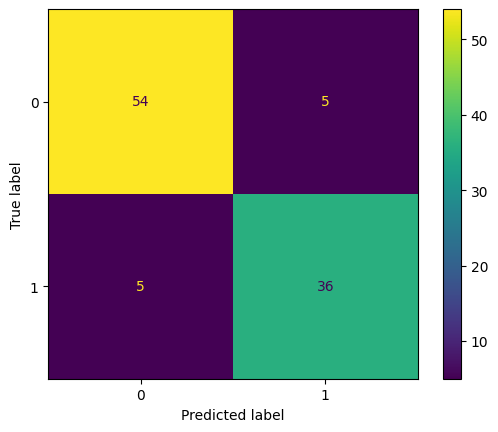

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [92]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

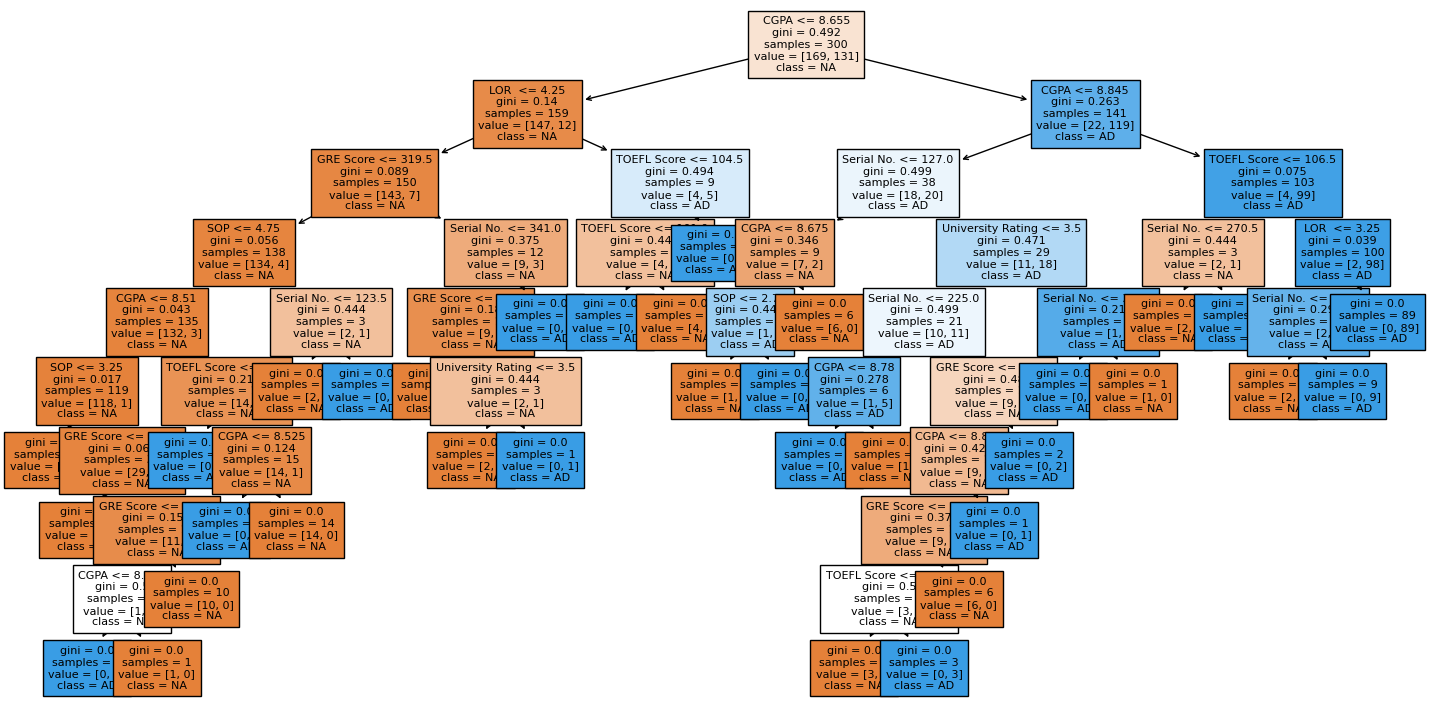

In [104]:
plt.figure(figsize=(18,9))
plot_tree(classifier, fontsize=8, filled=True,
          feature_names=x.columns, class_names=['NA', 'AD']);